In [38]:
import sys
import importlib

import numpy as np
import pandas as pd
import os.path

# Import the model we are using
import seaborn as sns
import matplotlib.pyplot as plt

import BTSSlayers as btss
importlib.reload(btss)


<module 'BTSSlayers' from '/users/kent/mcarl6/python/github/Behavioral-Translation-Style-Space/BTSSlayers.py'>

In [39]:
# set dataframe vizualisation options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Analyse BTSS 
- read BTSS sessions

Reading: AR22


In [40]:
# read 491 translation sessions from the TPR-DB
GD = pd.read_csv('sorted.gaze.clean.txt', sep="\t", dtype=None)

# read the Tables from the TPR-DB
BTSS1 = btss.readBTSSsessions(GD['Study-Session'], verbose=0)

# rename for easier use
AUdf = BTSS1['au1']
KBdf = BTSS1['kb1'] 
PUdf  = BTSS1['pu1']
HOFdf  = BTSS1['hof']
POLdf = BTSS1['pol']
PHdf  = BTSS1['ph1']

## inspect BTSS 

In [33]:
AUdf.head()

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Phase,Type,Dur,SGid,SGnbr,TGid,TGnbr,Ins,Del,PosS,PosT,Scatter,CrossS,CrossT,Gram5,GazePath,FixS,TrtS,FixT,TrtT,KBI,PUB,Edit,ProbSgaze,ProbTgaze,ProbCgaze,ProbSTCgaze,HSgaze,HTgaze,HCgaze,HSTCgaze,StudySession,End,Dur_L,Dur_R,Dur_S,Dur_N,STs_TTs,NextTime,Total_Dur,One,MaxDur,RelDur_L,RelDur_R,RelDur_S,RelDur_N,GPlabel,KBtype,PUnbr,PUdur,KBnbr,KBdur,HOF,WperFix,HOFnbr,Tstyles,LogDur,LogDur_L,LogDur_R,LogDur_S,LogIns,LogDel,LogKBI,LogPUB
0,1,AR22,P01_P3,en,ar,P,3,P01,77,O,1,594,---,0,---,0,0,0,---,---,0.0,0.0,0.0,10000,S:60+S:60+T:58,2,283,1,0,400,1000,---,0.8947,0.3333,0.6491,0.3158,0.5511,2.7733,1.3938,2.8581,AR22-P01_P3,671,0,289,0,305,1,671.0,594,1,594,0.0,0.486532,0.000,0.513468,RN,P,1,26392,1,26392,O,0.250000,1,0,6.388561,0.0,5.669881,0.000000,0.0,0.0,5.993961,6.908755
1,2,AR22,P01_P3,en,ar,P,3,P01,671,O,2,1297,---,0,---,0,0,0,---,---,0.0,0.0,0.0,21000,T:58+T:16+T:1+T:2+S:7,1,0,4,1112,400,1000,---,0.9474,0.6421,0.7895,0.5474,0.2711,1.4949,1.0144,1.9441,AR22-P01_P3,1968,0,0,1297,0,4,1968.0,1297,1,1297,0.0,0.000000,1.000,0.000000,S,P,1,26392,1,26392,R,0.666667,2,0,7.168580,0.0,0.000000,7.168580,0.0,0.0,5.993961,6.908755
2,3,AR22,P01_P3,en,ar,P,3,P01,1968,O,1,167,---,0,---,0,0,0,---,---,0.0,0.0,0.0,12100,T:2+S:7,1,167,1,7,400,1000,---,0.9737,0.6316,0.8421,0.5526,0.1487,1.3989,0.8700,1.8171,AR22-P01_P3,2135,0,0,167,0,1,2135.0,167,1,167,0.0,0.000000,1.000,0.000000,S,P,1,26392,1,26392,R,0.333333,2,0,5.123964,0.0,0.000000,5.123964,0.0,0.0,5.993961,6.908755
3,4,AR22,P01_P3,en,ar,P,3,P01,2135,O,8,5505,---,0,---,0,0,0,---,---,0.0,0.0,0.0,81210,---,0,0,0,0,400,1000,---,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,AR22-P01_P3,7640,0,0,0,5505,0,7640.0,5505,1,5505,0.0,0.000000,0.000,1.000000,N,P,1,26392,1,26392,R,0.000000,2,0,8.613594,0.0,0.000000,0.000000,0.0,0.0,5.993961,6.908755
4,5,AR22,P01_P3,en,ar,P,3,P01,7640,O,2,250,---,0,---,0,0,0,---,---,0.0,0.0,0.0,28121,T:45+S:56,1,0,1,217,400,1000,---,0.6316,0.3947,0.5000,0.3421,0.6337,2.4686,1.1766,2.8384,AR22-P01_P3,7890,0,0,217,33,1,7890.0,250,1,250,0.0,0.000000,0.868,0.132000,S,P,1,26392,1,26392,R,0.333333,2,0,5.525453,0.0,0.000000,5.384495,0.0,0.0,5.993961,6.908755


In [20]:
KBdf.head()

,StudySession,KBnbr,Time,Dur,Ins,Del,Tstyles,KBtype,KBseq,PUnbr,AUseq,AUcount,LogDur,Study,Session,Id,SL,TL,Task,Text,Part
0,ACS08-P03_T1,1,3676,6714,0,0,0,P,-,1,121282181812,12,8.812223,ACS08,P03_T1,1,en,da,T,1,P03
1,ACS08-P03_T1,2,84254,1,1,0,0,I,I,2,6,1,0.693147,ACS08,P03_T1,2,en,da,T,1,P03
2,ACS08-P03_T1,3,84255,396,0,0,0,P,-,3,28,2,5.983936,ACS08,P03_T1,3,en,da,T,1,P03
3,ACS08-P03_T1,4,85047,779,19,4,0,C,CCCCCCCC,4,46464646,8,6.659775,ACS08,P03_T1,4,en,da,T,1,P03
4,ACS08-P03_T1,5,91282,425,0,0,0,P,-,5,218,3,6.056003,ACS08,P03_T1,5,en,da,T,1,P03


In [94]:
PUdf.head()

,StudySession,PUnbr,Time,Dur,Ins,Del,Tstyles,PUtype,KBseq,KBcount,HOFset,HOFnbr,LogDur
0,BML12-P01_T1,1,280,91736,0,0,0,000,-,54,HO,4,11.426681
1,BML12-P01_T1,2,92016,3656,25,1,0,305,IIICCCCC,10,F,5,8.204398
2,BML12-P01_T1,3,95672,547,0,0,0,000,-,1,H,6,6.306275
3,BML12-P01_T1,4,96219,797,0,6,0,010,D,1,H,6,6.682109
4,BML12-P01_T1,5,97016,937,0,0,0,000,-,1,H,6,6.843750


In [21]:
HOFdf.head()

,Id,Study,Session,SL,TL,Task,Text,Part,Time,Dur,HOF,Ins,Del,KBseq,KBcount,Dur_L,Dur_R,Dur_S,Dur_N,RelDur_L,RelDur_R,RelDur_S,RelDur_N,LogDur_L,LogDur_R,LogDur_S,LogDur_N
0,1,ACS08,P03_T1,en,da,T,1,P03,3676,73487,O,0,0,-,1,55485,8053,9929,20,0.755032,0.109584,0.135112,0.000272,10.923886,8.993924,9.203316,3.044522
1,1,ACS08,P03_T1,en,da,T,1,P03,77163,7092,H,1,0,I,12,0,498,3564,3030,0.000000,0.070220,0.502538,0.427242,0.000000,6.212606,8.178919,8.016648
2,1,ACS08,P03_T1,en,da,T,1,P03,84255,8304,F,19,4,CCCCCCCC,13,379,1556,1462,4907,0.045641,0.187380,0.176060,0.590920,5.940171,7.350516,7.288244,8.498622
3,2,ACS08,P03_T1,en,da,T,1,P03,92559,2042,O,1,0,I,3,1051,0,970,21,0.514691,0.000000,0.475024,0.010284,6.958448,0.000000,6.878326,3.091042
4,2,ACS08,P03_T1,en,da,T,1,P03,94601,1103,F,3,3,C,1,0,278,825,0,0.000000,0.252040,0.747960,0.000000,0.000000,5.631212,6.716595,0.000000


In [22]:
POLdf.head()

,Id,Study,Session,StudySession,Tstyles,SL,TL,Task,Text,Part,Time,HOF,Ins,Del,InEff,Dur,Odur,Hdur,Rdur,Fdur,RelOdur,RelHdur,RelRdur,RelFdur,LogDur,LogOdur,LogHdur,LogRdur,LogFdur,Dur_L,Dur_R,Dur_S,Dur_N,RelDur_L,RelDur_R,RelDur_S,RelDur_N,D,O,H,R,F,I,DOHRFI
0,1,ACS08,P03_T1,ACS08-P03_T1,0,en,da,T,1,P03,3676,OHF,20,4,0.166667,88883,73487,7092,0,8304,0.826784,0.079790,0.000000,0.093426,11.395087,11.204877,8.866864,0.000000,9.024613,55864,10107,14955,7957,0.628512,0.113711,0.168255,0.089522,2,2,0,0,0,1,P:220001
1,2,ACS08,P03_T1,ACS08-P03_T1,0,en,da,T,1,P03,92559,OF,4,3,0.428571,3145,2042,0,0,1103,0.649285,0.000000,0.000000,0.350715,8.053887,7.622175,0.000000,0.000000,7.006695,1051,278,1795,21,0.334181,0.088394,0.570747,0.006677,0,2,0,0,1,1,P:020011
2,3,ACS08,P03_T1,ACS08-P03_T1,0,en,da,T,1,P03,95704,OHFRFHR,72,19,0.208791,43404,3490,15494,8846,15574,0.080407,0.356972,0.203806,0.358815,10.678330,8.157944,9.648273,9.087834,9.653422,9968,6733,9312,17391,0.229656,0.155124,0.214542,0.400677,2,0,1,0,1,1,P:201011
3,4,ACS08,P03_T1,ACS08-P03_T1,0,en,da,T,1,P03,139108,ORH,8,13,0.619048,5004,1296,1450,2258,0,0.258993,0.289768,0.451239,0.000000,8.518193,7.167809,7.280008,7.722678,0.000000,1475,598,2891,40,0.294764,0.119504,0.577738,0.007994,0,1,1,1,0,1,P:011101
4,5,ACS08,P03_T1,ACS08-P03_T1,0,en,da,T,1,P03,144112,OR,0,0,0.000000,3908,857,0,3051,0,0.219294,0.000000,0.780706,0.000000,8.271037,6.754604,0.000000,8.023552,0.000000,1694,200,1974,40,0.433470,0.051177,0.505118,0.010235,0,0,0,1,0,0,P:000100


In [23]:
PHdf.head()

,StudySession,Phase,Time,Dur,Tstyles,HOFseq,HOFnbr,Ins,Del,TotalDur,TotalLogDur,Study,Session,Id,SL,TL,Task,Text,Part,LogDur,RelDur
0,ACS08-P03_T1,D,84254,1250961,0,HFOFOHFRFHRORHOROHORORFHORFOFOROHRHOHFOHORFHOH...,1018,1412,424,1359799,14.122849,ACS08,P03_T1,1,en,da,T,1,P03,14.039423,0.919960
1,ACS08-P03_T1,O,3676,80578,0,OH,12,0,0,1359799,14.122849,ACS08,P03_T1,2,en,da,T,1,P03,11.296993,0.059257
2,ACS08-P03_T1,R,1335215,28260,0,RORORORH,23,21,17,1359799,14.122849,ACS08,P03_T1,3,en,da,T,1,P03,10.249238,0.020782
3,ACS08-P08_T1,D,2418,774015,0,FHFHORFORFHOFRFORFHFOHORFORFOHFORFHFOHFHFRFOFO...,579,1442,360,830721,13.630052,ACS08,P08_T1,1,en,da,T,1,P08,13.559348,0.931739
4,ACS08-P08_T1,O,2384,34,0,F,1,0,0,830721,13.630052,ACS08,P08_T1,2,en,da,T,1,P08,3.555348,0.000041


# HOF analysis


## Distribution of log HOF values

- log duration
- log insertions and log deletions
- log Linear reading, Regressive reading, scattered reading

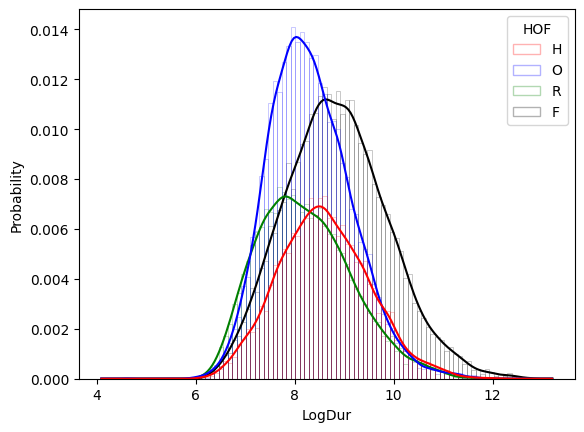

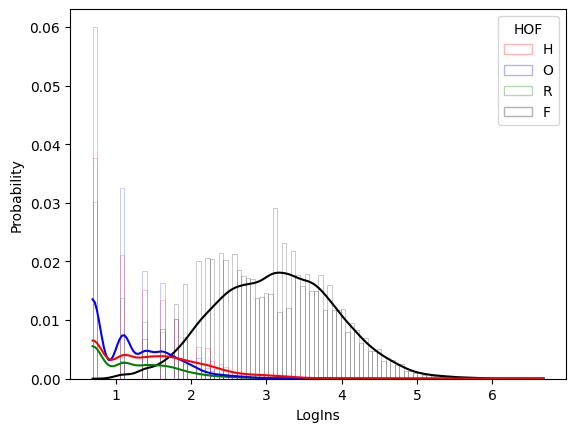

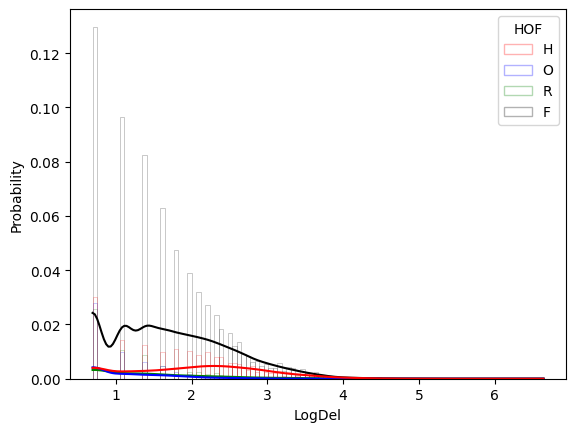

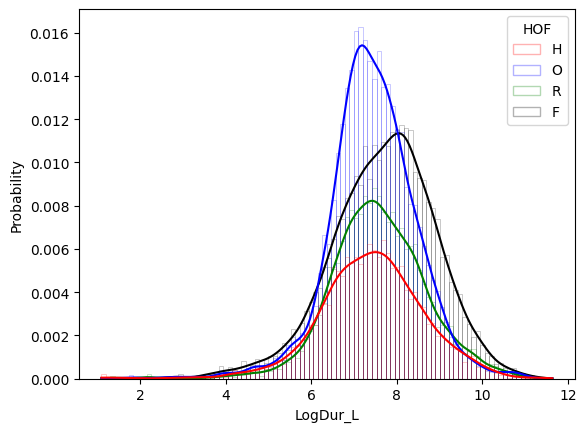

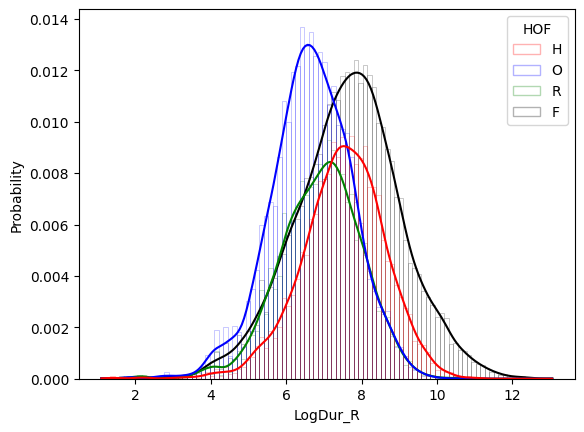

<Axes: xlabel='LogDur_S', ylabel='Probability'>

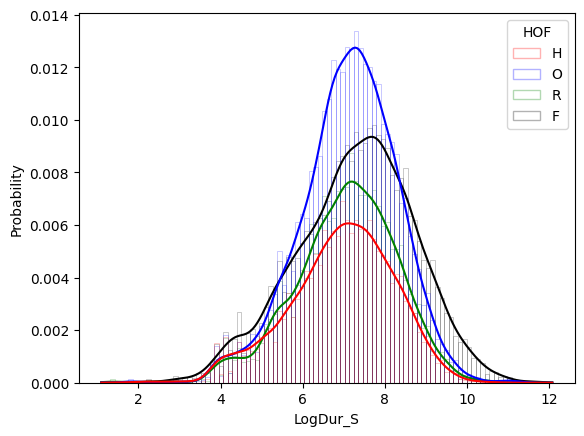

In [44]:

HOF_order = ["H", "O", "R", "F"]
palette = ["red","blue","green", "black"]

HOFdf['LogIns'] = np.log(HOFdf['Ins'] + 1)
HOFdf['LogDel'] = np.log(HOFdf['Del'] + 1)

AU1 = HOFdf[HOFdf.Dur > 1]
sns.histplot(data=AU1, x="LogDur", bins=100, alpha=0.3, hue='HOF', fill=False, kde=True, stat="probability", 
             palette=palette, hue_order=HOF_order )
plt.show()

AU1 = HOFdf[(HOFdf.LogIns > 0)]
sns.histplot(data=AU1, x="LogIns", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, stat="probability", 
             palette=palette, hue_order=HOF_order)
plt.show()

#AU1 = HOFdf[(HOFdf.Del > 0) & (HOFdf.HOF.isin(['H','F']))]
AU1 = HOFdf[(HOFdf.LogDel > 0)]
sns.histplot(data=AU1, x="LogDel", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, stat="probability", 
             palette=palette, hue_order=HOF_order)
plt.show()

AU1 = HOFdf[HOFdf.LogDur_L > 1]
sns.histplot(data=AU1, x="LogDur_L", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, stat="probability", 
             palette=palette, hue_order=HOF_order)
plt.show()

AU1 = HOFdf[HOFdf.LogDur_R > 1]
sns.histplot(data=AU1, x="LogDur_R", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, 
             stat="probability", palette=palette, hue_order=HOF_order)
plt.show()

AU1 = HOFdf[HOFdf.LogDur_S > 1]
sns.histplot(data=AU1, x="LogDur_S", bins=100, alpha=0.3, hue='HOF', kde=True, fill=False, 
             stat="probability", palette=palette, hue_order=HOF_order)


## Distribution of Gaze Duration

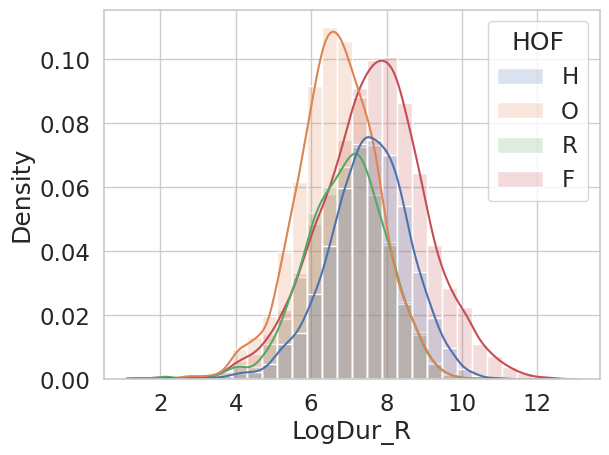

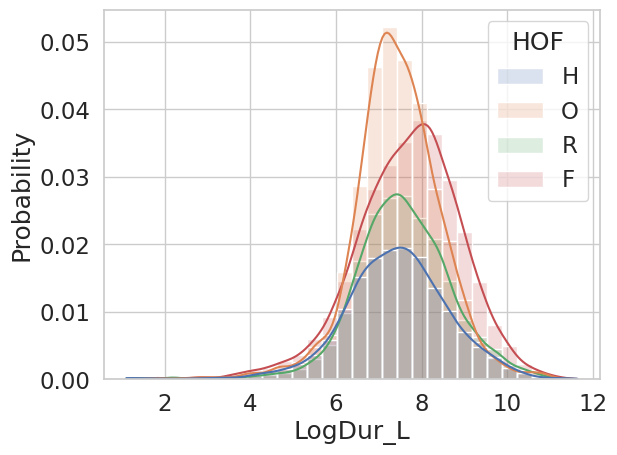

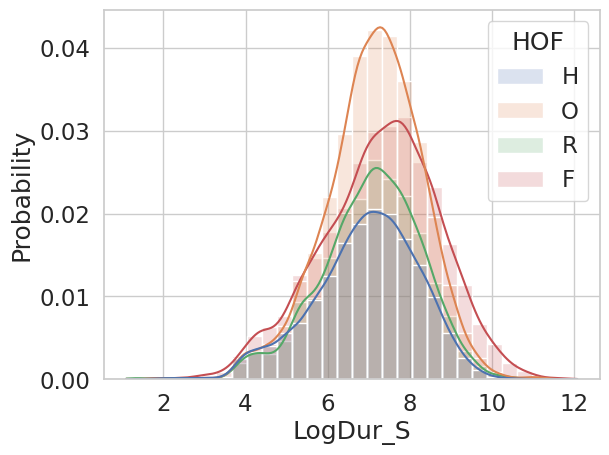

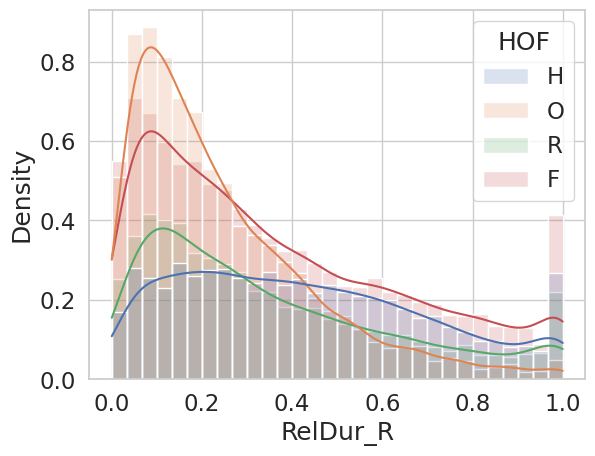

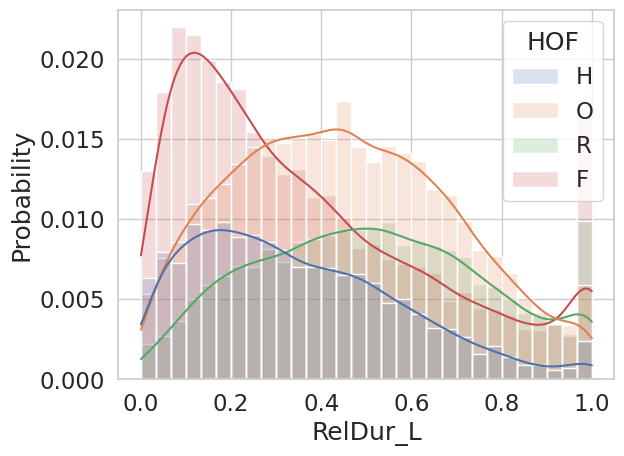

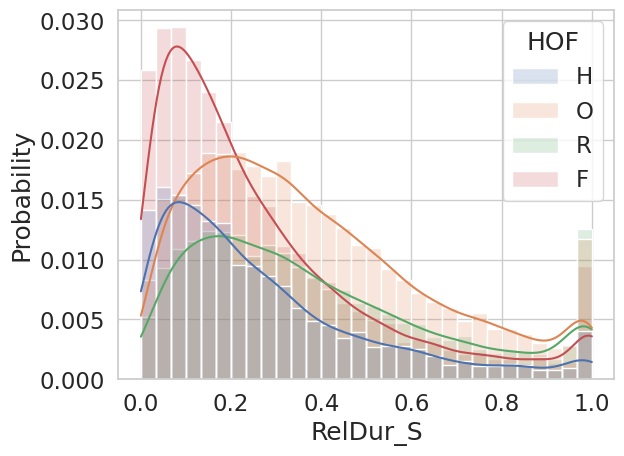

In [63]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

desired_order = ["H", "O", "R","F"]

H = HOFdf[HOFdf.LogDur_R > 1]
sns.histplot(data=H, x="LogDur_R", bins=30, hue='HOF', alpha=0.2, stat="density", kde = True, hue_order=desired_order )
plt.show()

H = HOFdf[HOFdf.LogDur_L > 1]
sns.histplot(data=H, x="LogDur_L", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order)
plt.show()

H = HOFdf[HOFdf.LogDur_S > 1]
sns.histplot(data=H, x="LogDur_S", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order)
plt.show()

H = HOFdf[HOFdf.RelDur_R > 0]
sns.histplot(data=H, x="RelDur_R", bins=30, hue='HOF', alpha=0.2, stat="density", kde = True, hue_order=desired_order )
#plt.title(title="Type 1 reading per HOF states")
plt.show()

H = HOFdf[HOFdf.RelDur_L > 0]
sns.histplot(data=H, x="RelDur_L", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order  )
plt.show()

H = HOFdf[HOFdf.RelDur_S > 0]
sns.histplot(data=H, x="RelDur_S", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order  )
plt.show()



## LogOdds of ST / TT Fixations per HOF state

fixation odds is ${\frac {p}{1-p}}$ where $p$ is the refixation probability. 
$p = 1$ if every fixation in a HOF state is on a different word (refixaton chance = 0). 

logOdds is the logarithm of the fixation odds, i.e, the chances of how often a word is refixated:
- logOdds = 0: 50% refixation chance (every word is on average fixated twice)
- logOdds > 0: if refixation on a word chance > 50%
- logOdds < 0: if refixation on a word chance < 50%


it's computed as:

- $fixLogOdds = \mathrm{logit} (fixRel)= \log (\frac {fixRel}{1-fixRel})$

where:
- $fixRel$: number different ST or TT words fixated  $ fixRel= \frac{fixDiff}{fixTot}$

and
- $fixDiff$: number different ST / TT words fixated
- $fixTot$: total number of ST /TT fixations per HOF state


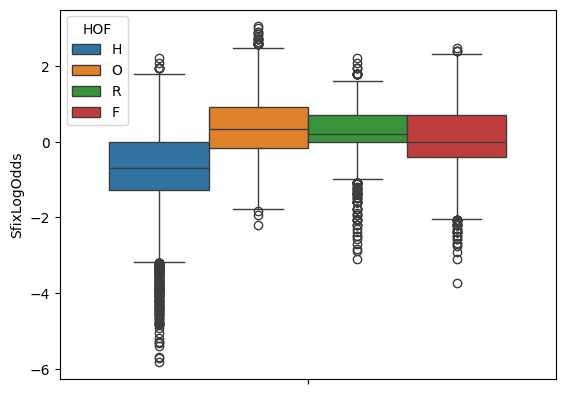

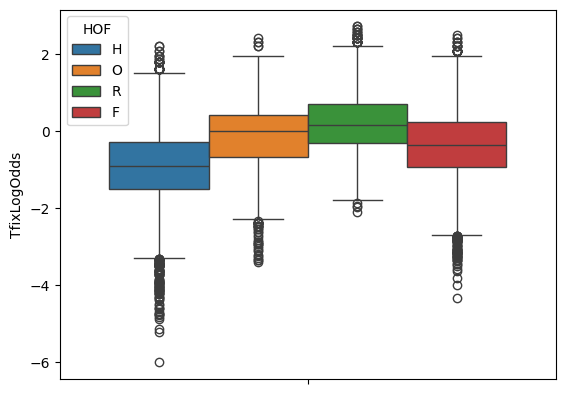

In [62]:
desired_order = ["H", "O", "R", "F"]

# SfixTot: total number of ST fixations per HOF state
# SfixDiff: number different ST words fixated
# SfixRel: number different TT words fixated
# SfixLogOdds: chances of how often an ST word is refixated

# TfixTot: total number of TT fixations per HOF state
# TfixDiff: number different TT words fixated

HOFdf['SfixRel'] = HOFdf['SfixDiff']/HOFdf['SfixTot']
HOFdf['TfixRel'] = HOFdf['TfixDiff']/HOFdf['TfixTot']

HOFdf['SfixLogOdds'] = np.log(HOFdf['SfixRel']/(1-HOFdf['SfixRel']))
HOFdf['TfixLogOdds'] = np.log(HOFdf['TfixRel']/(1-HOFdf['TfixRel']))

sns.boxplot(data=HOFdf, y='SfixLogOdds' , hue='HOF', hue_order=desired_order )
plt.show()

#H = HOFdf[HOFdf['TfixLogOdds'].notna()]
sns.boxplot(data=HOFdf, y='TfixLogOdds' , hue='HOF', hue_order=desired_order )
plt.show()


## LogOdds of reading patterns:
    - Dur_L: linead reading
    - Dur_R: regressive reading
    - Dur_S: scattered gaze data
    - Dur_N: no fixation data recorded

/home/jupyterlab/JupyterLab/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


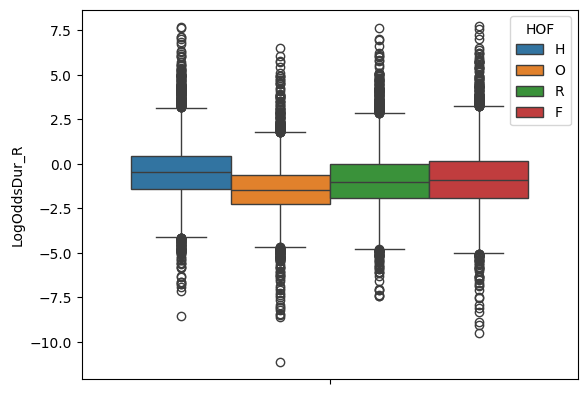

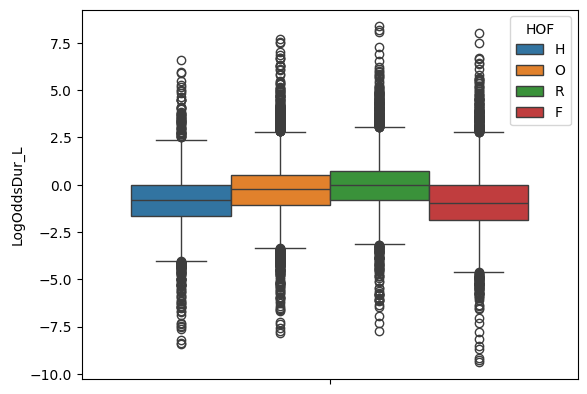

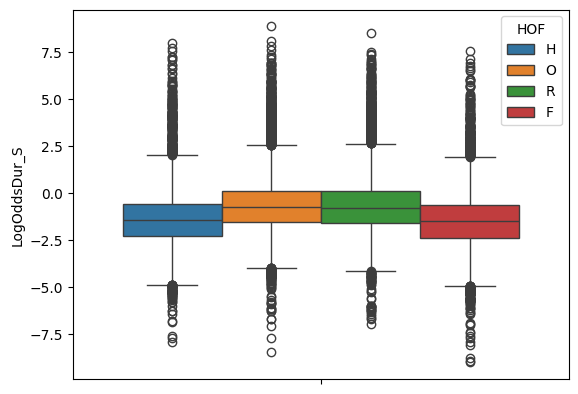

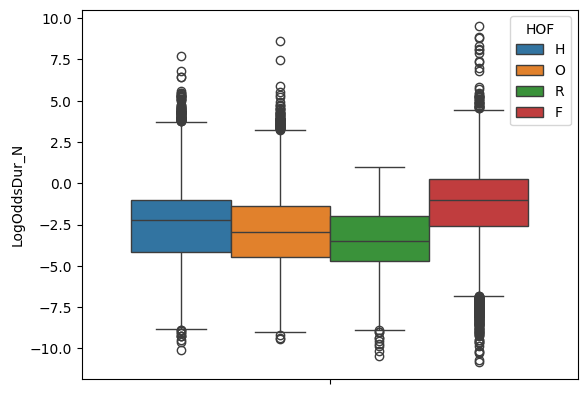

In [59]:
HOFdf['LogOddsDur_L'] = np.log(HOFdf['RelDur_L']/(1-HOFdf['RelDur_L']))
HOFdf['LogOddsDur_R'] = np.log(HOFdf['RelDur_R']/(1-HOFdf['RelDur_R']))
HOFdf['LogOddsDur_S'] = np.log(HOFdf['RelDur_S']/(1-HOFdf['RelDur_S']))
HOFdf['LogOddsDur_N'] = np.log(HOFdf['RelDur_N']/(1-HOFdf['RelDur_N']))

sns.boxplot(data=HOFdf, y='LogOddsDur_R' , hue='HOF', hue_order=desired_order )
plt.show()

sns.boxplot(data=HOFdf, y='LogOddsDur_L' , hue='HOF', hue_order=desired_order )
plt.show()

sns.boxplot(data=HOFdf, y='LogOddsDur_S' , hue='HOF', hue_order=desired_order )
plt.show()

sns.boxplot(data=HOFdf, y='LogOddsDur_N' , hue='HOF', hue_order=desired_order )
plt.show()



# Policy 

policy starts with an O-state 
- add policy index in HOF table
- create POLdf
- add features


## Check normal distribution

LogOdur Mean:8.314622117576574 Std:0.8342878150964896 Statistic: 504.6687, P-value: 0.00000000
LogOdur Normal Data: The sample likely does not come from a normal distribution (reject H0).


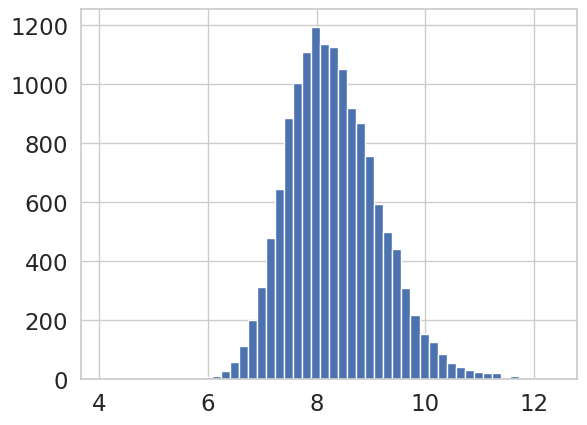

LogHdur Mean:8.792987168673143 Std:1.025966118434005 Statistic: 97.8009, P-value: 0.00000000
LogHdur Normal Data: The sample likely does not come from a normal distribution (reject H0).


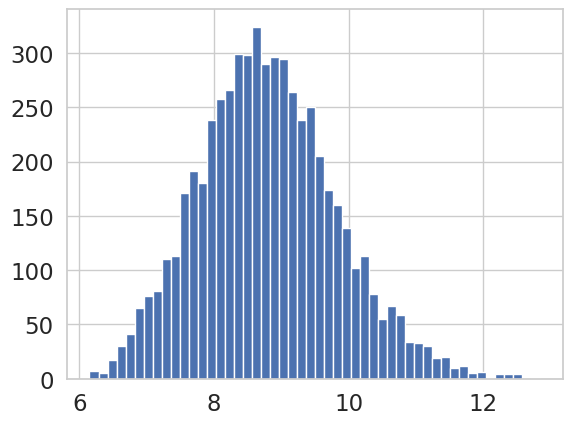

LogRdur Mean:8.36996554734288 Std:1.0835981081956894 Statistic: 309.0770, P-value: 0.00000000
LogRdur Normal Data: The sample likely does not come from a normal distribution (reject H0).


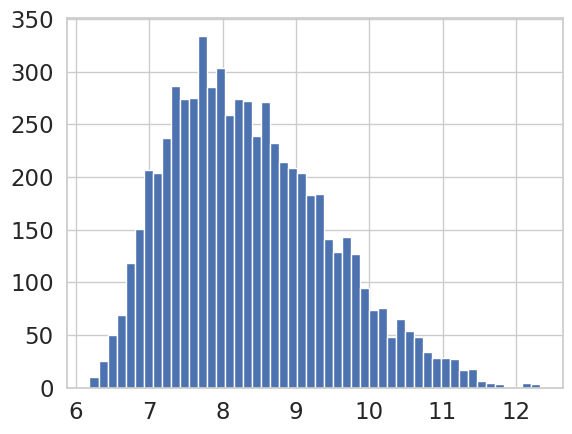

LogFdur Mean:9.08558442679509 Std:1.0916913011591027 Statistic: 186.8280, P-value: 0.00000000
LogFdur Normal Data: The sample likely does not come from a normal distribution (reject H0).


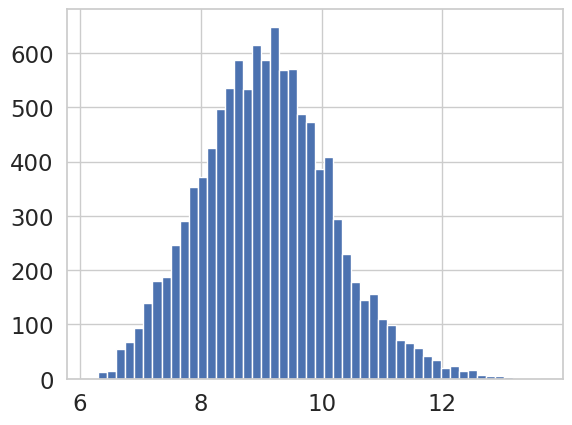

LogInEff Mean:2.089444365746622 Std:0.9486851513434527 Statistic: 597.4268, P-value: 0.00000000
LogInEff Normal Data: The sample likely does not come from a normal distribution (reject H0).


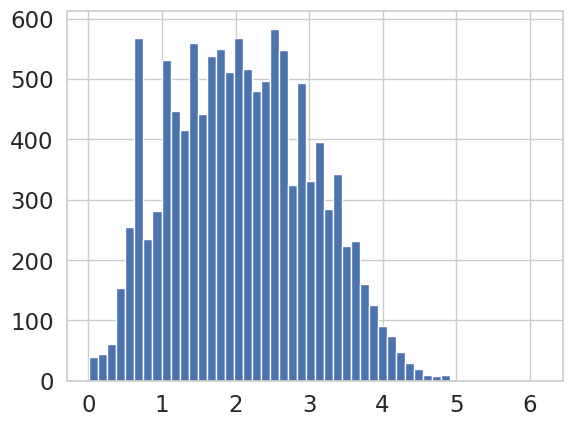

In [64]:
# normal distribution
import numpy as np
from scipy import stats

POLdf['LogInEff'] = np.log((POLdf['Ins'] + POLdf['Del'] + 1)/ (POLdf['Del'] + 1))

PL1 = POLdf
T = ['LogOdur', 'LogHdur', 'LogRdur', 'LogFdur', 'LogInEff']
#T = ['RelRdur']

# Interpret the results (common significance level alpha = 0.05)
alpha = 0.05
for t in T:
    D1 =  PL1[PL1[t] > 0][t]

    statistic_normal, pvalue_normal = stats.normaltest(D1)
    M1 = D1.mean()
    S1 = D1.std()
    
    print(t, f"Mean:{M1} Std:{S1} Statistic: {statistic_normal:.4f}, P-value: {pvalue_normal:.8f}")
    if pvalue_normal > alpha:
        print(t, "Normal Data: The sample likely comes from a normal distribution (fail to reject H0).")
    else:
        print(t, "Normal Data: The sample likely does not come from a normal distribution (reject H0).")
        
    D1.hist(bins=50)
    plt.show()



## Count Types of Policies

- count types of policies per DOHFRI label
- count types of policies per HOF sequences
 

In [68]:
H = pd.concat([POLdf.DOHRFI.value_counts(), 
               POLdf.DOHRFI.value_counts(normalize=True)], 
              axis=1, keys=["Count", "%"]).reset_index()
H['CumSum'] = H['Count'].cumsum()
H['CumSum%'] = H['%'].cumsum()

print("Number of different Policy labels:", H.shape)
H.head(30)

Number of different Policy labels: (469, 5)


,DOHRFI,Count,%,CumSum,CumSum%
0,P:020000,619,0.042511,619,0.042511
1,P:020100,568,0.039008,1187,0.081519
2,P:020010,547,0.037566,1734,0.119085
3,P:200021,356,0.024449,2090,0.143534
4,P:010020,323,0.022183,2413,0.165717
5,P:120000,303,0.020809,2716,0.186526
6,P:200020,290,0.019916,3006,0.206442
7,P:110020,271,0.018611,3277,0.225053
8,P:220000,254,0.017444,3531,0.242497
9,P:120010,245,0.016826,3776,0.259323


## Distribution of different HOF label sequences

In [69]:
# Types of policies
X = POLdf.groupby(['HOF']).agg(
    {'Dur': 'mean', 
     'Odur': 'mean', 
     'Ins': 'mean', 
     'Del': 'mean', 
     'InEff' 	: 'mean',
     
     'RelOdur' 	: 'mean',
     'RelDur_L' : 'mean',
     'RelDur_R' : 'mean',
     'RelDur_S' : 'mean',
     'RelDur_N' : 'mean',
     
     'RelOdur' : 'mean',
     'RelHdur' : 'mean',
     'RelRdur' : 'mean',
     'RelFdur' : 'mean',

     'LogOdur' : 'mean',
     'LogHdur' : 'mean',
     'LogRdur' : 'mean',
     'LogFdur' : 'mean',

}).reset_index()


X['InEff1']  = X['Del'] / (X['Ins'] + X['Del'])

H = pd.concat([POLdf.HOF.value_counts(), 
               POLdf.HOF.value_counts(normalize=True)], 
              axis=1, keys=["Count", "%"]).reset_index()
H['CumSum'] = H['Count'].cumsum()
H['CumSum%'] = H['%'].cumsum()

POLtype = pd.merge(H, X)
POLtype.head(20)

,HOF,Count,%,CumSum,CumSum%,Dur,Odur,Ins,Del,InEff,RelOdur,RelDur_L,RelDur_R,RelDur_S,RelDur_N,RelHdur,RelRdur,RelFdur,LogOdur,LogHdur,LogRdur,LogFdur,InEff1
0,OF,4874,0.334730,4874,0.334730,18893.853714,7047.506360,33.475174,3.705581,0.083053,0.412829,0.276133,0.177542,0.275618,0.270707,0.000000,0.000000,0.587171,8.468147,0.000000,0.000000,8.891898,0.099664
1,OR,1798,0.123481,6672,0.458210,10194.744160,5178.399889,0.909344,0.435484,0.055049,0.540154,0.400074,0.149696,0.369694,0.080536,0.000000,0.459846,0.000000,8.201056,0.000000,8.007971,0.000000,0.323821
2,OH,1137,0.078085,7809,0.536296,14051.923483,6060.485488,2.045734,2.119613,0.144550,0.434986,0.247256,0.258705,0.256753,0.237286,0.565014,0.000000,0.000000,8.175423,8.512795,0.000000,0.000000,0.508868
3,ORF,708,0.048623,8517,0.584919,18949.090395,5121.536723,30.025424,4.209040,0.104734,0.314439,0.344322,0.209056,0.292923,0.153699,0.000000,0.217193,0.468368,8.228574,0.000000,7.834133,8.689702,0.122947
4,OHF,567,0.038940,9084,0.623858,25550.811287,6104.915344,31.770723,6.670194,0.151243,0.256997,0.248100,0.265352,0.222844,0.263705,0.335999,0.000000,0.407003,8.204024,8.538590,0.000000,8.736471,0.173518
5,OFR,516,0.035437,9600,0.659295,26348.887597,6155.540698,37.575581,5.135659,0.104386,0.279597,0.309653,0.184091,0.301706,0.204549,0.000000,0.235528,0.484876,8.410198,0.000000,8.203237,9.044462,0.120241
6,OFH,444,0.030492,10044,0.689788,23209.398649,6929.040541,30.497748,4.790541,0.123070,0.303065,0.256992,0.230821,0.236942,0.275245,0.295459,0.000000,0.401476,8.424173,8.374969,0.000000,8.724588,0.135754
7,OFHF,418,0.028707,10462,0.718495,42056.882775,6927.552632,70.782297,11.777512,0.118490,0.194777,0.248747,0.263717,0.208226,0.279310,0.198014,0.000000,0.607209,8.437130,8.476389,0.000000,9.762210,0.142654
8,OFRF,278,0.019092,10740,0.737587,47790.298561,7115.007194,75.464029,12.474820,0.128155,0.188181,0.291765,0.221410,0.293530,0.193295,0.000000,0.151947,0.659873,8.519926,0.000000,8.335776,9.986898,0.141858
9,ORFR,241,0.016551,10981,0.754138,26128.630705,5052.572614,21.925311,5.435685,0.182562,0.201668,0.412032,0.157425,0.296797,0.133746,0.000000,0.524300,0.274032,8.134530,0.000000,9.235178,8.428344,0.198665


## Relation inefficiency vs. some Policies

           InEff    InEff1
InEff   1.000000  0.951595
InEff1  0.951595  1.000000


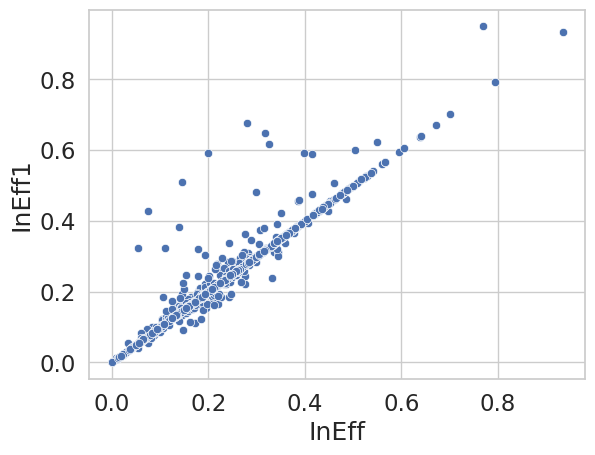

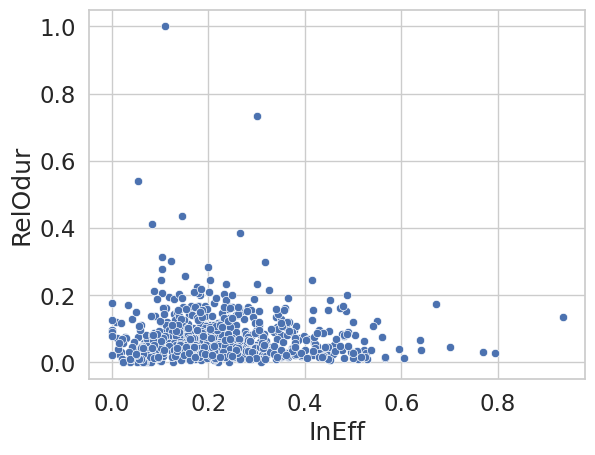

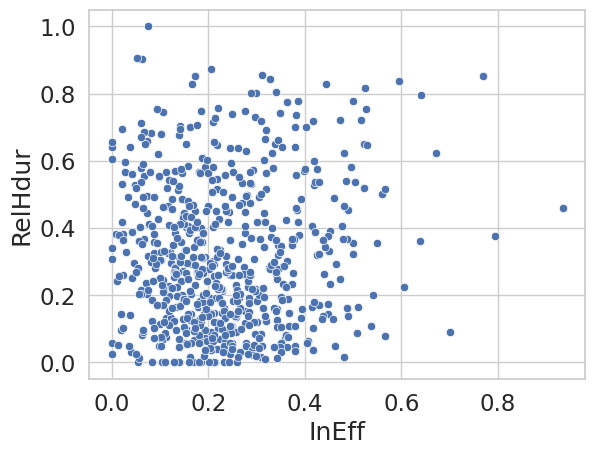

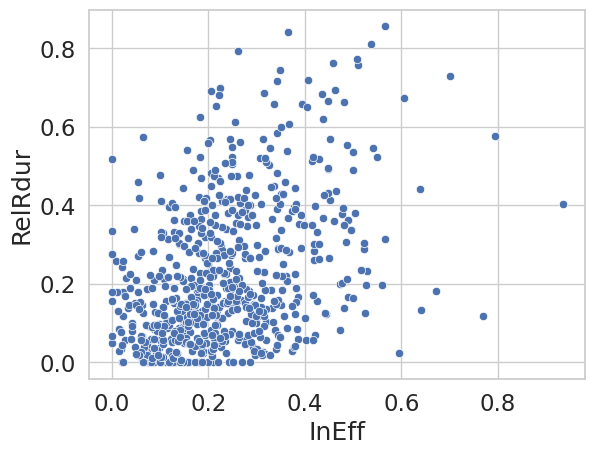

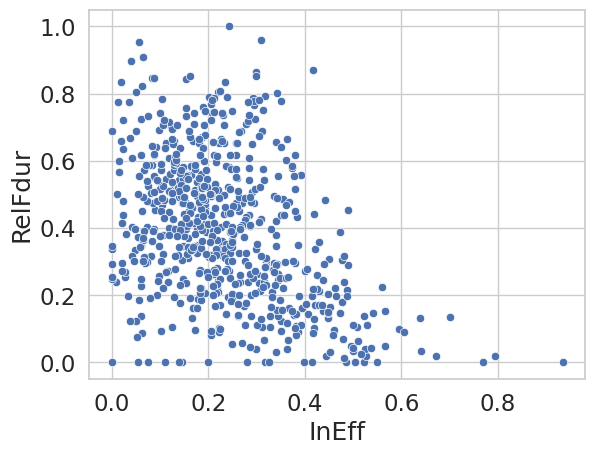

In [70]:
print(POLtype[['InEff', 'InEff1']].corr())
PT50 = ['OF', 'OR', 'OH']

PT1 = POLtype[POLtype.HOF.isin(PT50)]
PT1 = POLtype
#sns.histplot(data=POLtype, x="InEff", y='InEff1', stat="density", kde = True, palette='dark')
sns.scatterplot(data=PT1, x="InEff", y='InEff1')
plt.show()

sns.scatterplot(data=POLtype, x="InEff", y='RelOdur')
plt.show()

sns.scatterplot(data=POLtype, x="InEff", y='RelHdur')
plt.show()

sns.scatterplot(data=POLtype, x="InEff", y='RelRdur')
plt.show()

sns.scatterplot(data=POLtype, x="InEff", y='RelFdur')
plt.show()




In [72]:
# correlation
C = ['RelOdur', 'RelDur_L', 'RelDur_R', 'RelDur_S', 'RelDur_N', 'InEff']
PLO75 = ['OF', 'OR', 'OH']
PLO75 = ['OF']
PLO75 = ['OR']

POLdf[POLdf.HOF.isin(PLO75)][C].corr()


,RelOdur,RelDur_L,RelDur_R,RelDur_S,RelDur_N,InEff
RelOdur,1.000000,-0.133709,0.015116,0.046669,0.151931,-0.098431
RelDur_L,-0.133709,1.000000,-0.412698,-0.599067,-0.338699,0.009763
RelDur_R,0.015116,-0.412698,1.000000,-0.278850,-0.056218,0.000334
RelDur_S,0.046669,-0.599067,-0.278850,1.000000,-0.180774,-0.046957
RelDur_N,0.151931,-0.338699,-0.056218,-0.180774,1.000000,0.058992
InEff,-0.098431,0.009763,0.000334,-0.046957,0.058992,1.000000


## Log duration of Policies

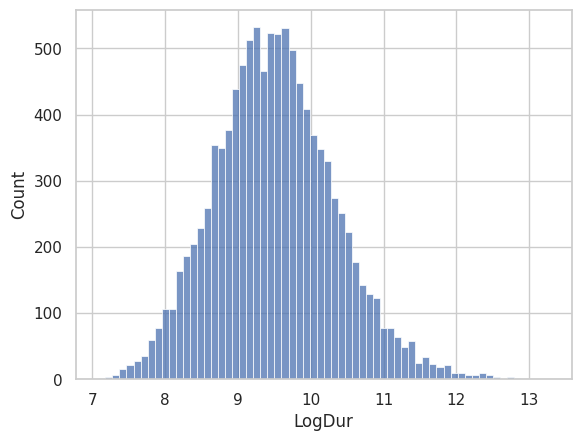

In [76]:
# Log duration of Policies
PLO75 = ['OF', 'OR', 'OH', 'OFHF', 'OHF', 'OFH', 'ORF', 'OFR', 'OFHFHF', 'OFRF']

AU1 = POLdf
sns.histplot(data=AU1[AU1['HOF'].isin(PLO75)], x="LogDur")
plt.show()


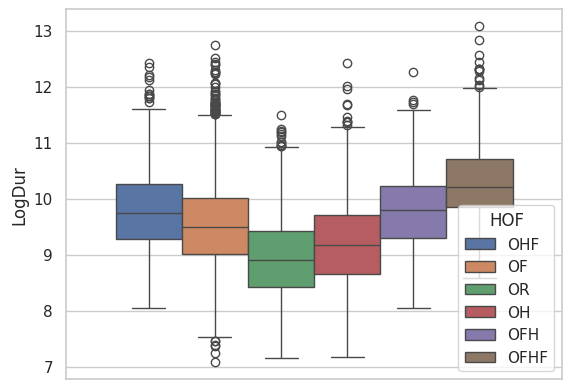

In [78]:
PLO75 = ['OF', 'OR', 'OH', 'OFHF', 'OHF', 'OFH', 'ORF', 'OFR', 'OFHFHF', 'OFRF']
PLO75 = ['OF', 'OR', 'OH', 'OFHF', 'OHF', 'OFH']

AU1 = POLdf
sns.boxplot(data=AU1[AU1['HOF'].isin(PLO75)], y="LogDur", hue="HOF")
plt.show()



# HOF states ~ Phases

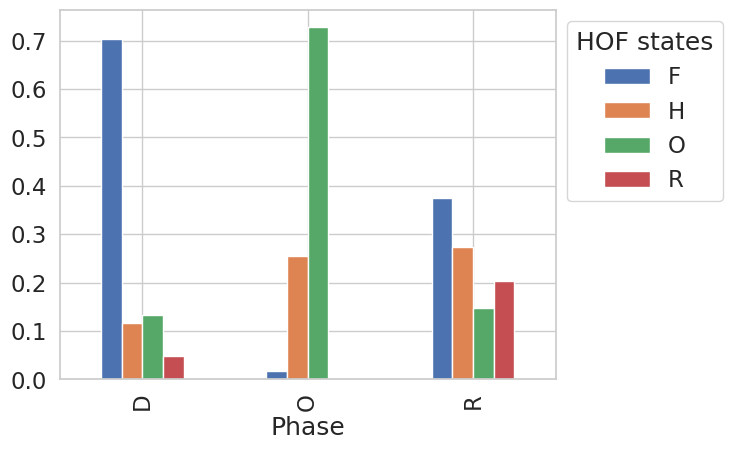

In [35]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


#desired_order = ["H", "O", "F"]
#sns.histplot(data=AUdf1[(AUdf1.Type == 1)], x="LogDur_R", bins=30, hue='HOF', alpha=0.2, stat="probability", kde = True, hue_order=desired_order )
#plt.show()

AU1 = AUdf[AUdf['LogDur'] > 1]
pd.crosstab(AU1['Phase'], AU1['HOF'], normalize='index').plot.bar()

desired_order = ["H", "O", "R", "F"]
plt.legend(bbox_to_anchor=(1, 1), title="HOF states", loc="upper left")
plt.show()


#pd.crosstab(AUdf['Phase'],AUdf['LabelT'], normalize='index').plot.bar()
#plt.show()


# Styles ~ Phases

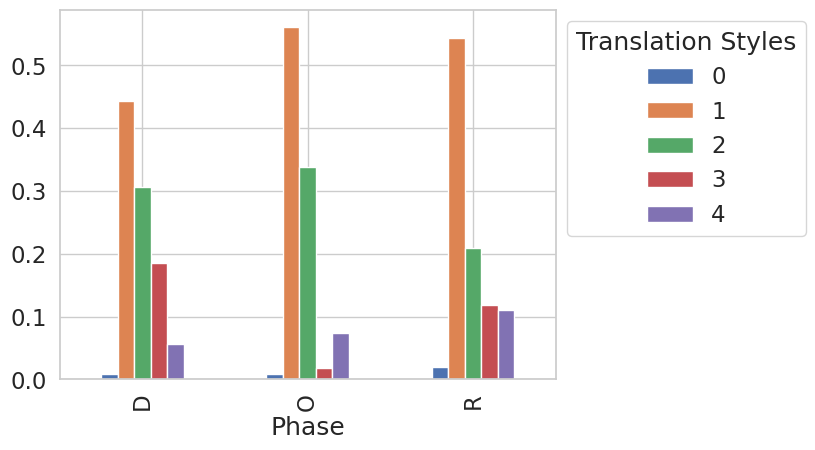

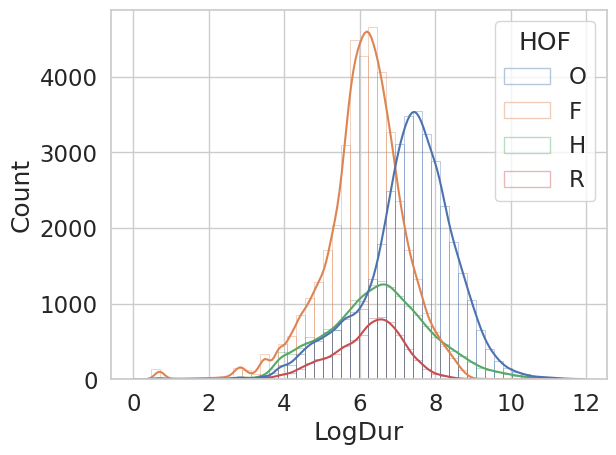

In [37]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")


desired_order = ["H", "O", "R", "F"]

#AU1 = AUdf[(AUdf['LogDur'] > 2) & (AUdf.Tstyles != '---')]
#AU1 = AUdf[(AUdf.Tstyles != '---')]
pd.crosstab(AU1['Phase'], AU1['Tstyles'], normalize='index').plot.bar()

plt.legend(bbox_to_anchor=(1, 1), title="Translation Styles", loc="upper left")
plt.show()

sns.histplot(data=AU1[(AU1.Type == 1) ], x="LogDur", bins=50, alpha=0.4, hue='HOF', fill=False, kde = True)
plt.show()


#pd.crosstab(AUdf['Phase'],AUdf['LabelT'], normalize='index').plot.bar()
#plt.show()


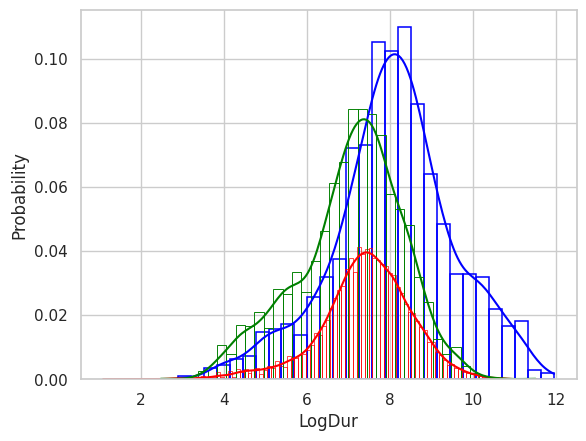

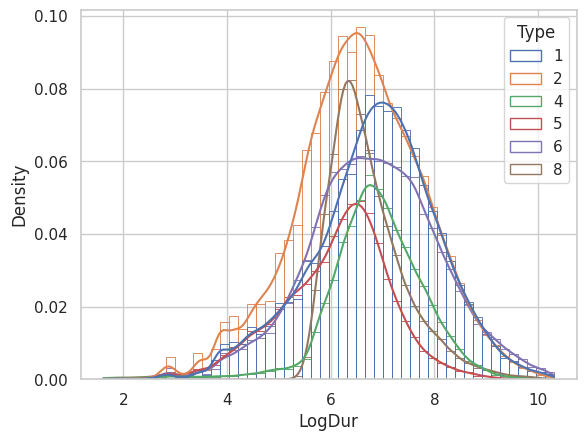

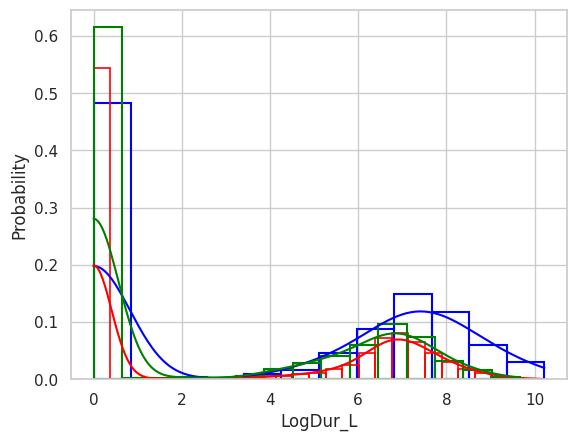

In [79]:
AUdf1 = AUdf[(AUdf.LogDur_L > 1) & (AUdf.LogDur_R > 1) & (AUdf.LogDur_S > 1)]
AUdf1 = AUdf[(AUdf.LogDur_L > 1) ]

Phase_order = ['O','D','R']
sns.histplot(data=AUdf1[(AUdf1.Type == 1) & (AUdf1.Phase == 'O')], x="LogDur", stat="probability", fill=False, kde = True, color='blue')
sns.histplot(data=AUdf1[(AUdf1.Type == 1) & (AUdf1.Phase == 'D')], x="LogDur", stat="probability", fill=False, kde = True, color='red')
sns.histplot(data=AUdf1[(AUdf1.Type == 1) & (AUdf1.Phase == 'R')], x="LogDur", stat="probability", fill=False, kde = True, color='green', hue_order=Phase_order)
plt.show()

AUdf1 = AUdf[(AUdf.Dur > 3) & (AUdf.Dur < 30000) ]
sns.histplot(data=AUdf1, x="LogDur", bins=50, alpha=1, hue='Type', stat="density", fill=False, kde=True, palette='deep')
plt.show()

sns.histplot(data=AUdf1[(AUdf1.Type == 1) & (AUdf1.Phase == 'O')], x="LogDur_L", stat="probability", fill=False, kde = True, color='blue')
sns.histplot(data=AUdf1[(AUdf1.Type == 1) & (AUdf1.Phase == 'D')], x="LogDur_L", stat="probability", fill=False, kde = True, color='red')
sns.histplot(data=AUdf1[(AUdf1.Type == 1) & (AUdf1.Phase == 'R')], x="LogDur_L", stat="probability", fill=False, kde = True, color='green', hue_order=Phase_order)

plt.show()


## Distribution of Phases 

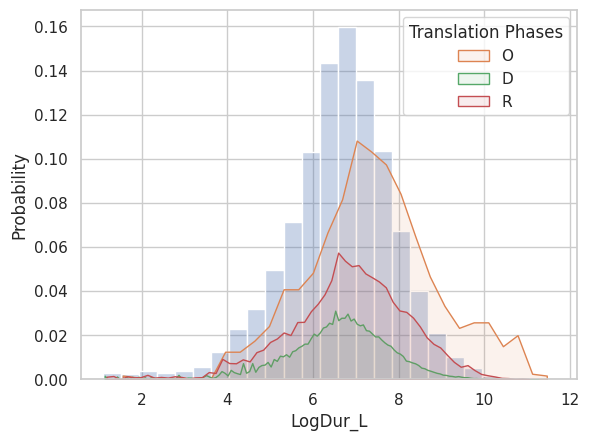

In [81]:
AUdf1 = AUdf[(AUdf.LogDur_L > 1)]

sns.histplot(data=AUdf1, x="LogDur_L", bins=25, alpha=0.3, stat="probability")
sns.histplot(data=AUdf1[(AUdf1.Phase == 'O')], x="LogDur_L", stat="probability", element="poly", alpha=0.1, kde = False )
sns.histplot(data=AUdf1[(AUdf1.Phase == 'D')], x="LogDur_L", stat="probability", element="poly", alpha=0.1, kde = False )
sns.histplot(data=AUdf1[(AUdf1.Phase == 'R')], x="LogDur_L", stat="probability", element="poly", alpha=0.1, kde = False )


desired_order = ["O", "D", "R"]
plt.legend(title="Translation Phases", loc="upper right", labels=desired_order)
plt.show()


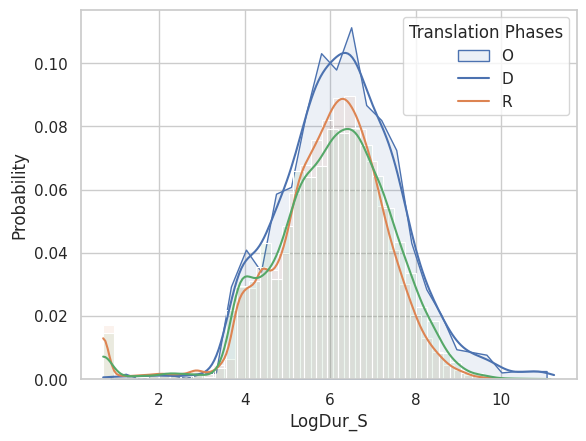

In [84]:
#AUdf1 = AUdf[(AUdf.LogDur_L > 1) & (AUdf.LogDur_R > 1) & (AUdf.LogDur_S > 1)]
AUdf1 = AUdf[(AUdf.LogDur_S > 0)]
sns.histplot(data=AUdf1[(AUdf1.Phase == 'O')], x="LogDur_S", bins=30, alpha=0.1, stat="probability", element="poly", kde = True )
sns.histplot(data=AUdf1[(AUdf1.Phase == 'D')], x="LogDur_S", bins=40, alpha=0.1, stat="probability", kde = True )
sns.histplot(data=AUdf1[(AUdf1.Phase == 'R')], x="LogDur_S", bins=40, alpha=0.1, stat="probability", kde = True )

#sns.histplot(data=AUdf1[(AUdf1.Phase == 'O')], x="RelDur_S", bins=30, alpha=0.1, stat="probability", kde = True )
#sns.histplot(data=AUdf1[(AUdf1.Phase == 'D')], x="RelDur_S", bins=40, alpha=0.1, stat="probability", kde = True )
#sns.histplot(data=AUdf1[(AUdf1.Phase == 'R')], x="RelDur_S", bins=40, alpha=0.1, stat="probability", kde = True )

#print(AUdf[(AUdf.Type == 1)
desired_order = ["O", "D", "R"]
plt.legend(title="Translation Phases", loc="upper right", labels=desired_order)
plt.show()


# Relation PUB and KBI

In [85]:
# how many different sessions
AUdf.drop_duplicates(subset=['Study','Session'])[['KBI','PUB']].describe()


,KBI,PUB
count,490.000000,490.000000
mean,453.355102,1311.534694
std,350.993927,965.374280
min,188.000000,375.000000
25%,282.000000,729.000000
50%,326.000000,984.000000
75%,468.000000,1545.000000
max,2996.000000,7533.000000


In [96]:
AU1 = AUdf.drop_duplicates(subset=['StudySession'])
AU1[["LogKBI", "LogPUB","KBI", "PUB"]].describe()


,LogKBI,LogPUB,KBI,PUB
count,490.000000,490.000000,490.000000,490.000000
mean,5.966159,7.004954,453.355102,1311.534694
std,0.482466,0.552435,350.993927,965.374280
min,5.241747,5.929589,188.000000,375.000000
25%,5.645447,6.593045,282.000000,729.000000
50%,5.789960,6.892642,326.000000,984.000000
75%,6.150603,7.343426,468.000000,1545.000000
max,8.005367,8.927181,2996.000000,7533.000000


## Distribution of Pauses for EN $\rightarrow$ X Translations

(365, 73) 
                KBI          PUB
count   365.000000   365.000000
mean    397.649315  1157.180822
std     312.842740   871.869546
min     188.000000   375.000000
25%     280.000000   705.000000
50%     312.000000   936.000000
75%     396.000000  1263.000000
max    2996.000000  7533.000000


/home/jupyterlab/JupyterLab/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/jupyterlab/JupyterLab/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


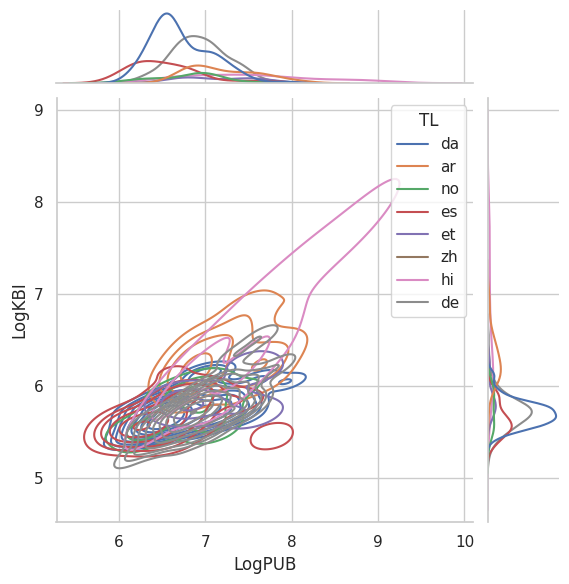

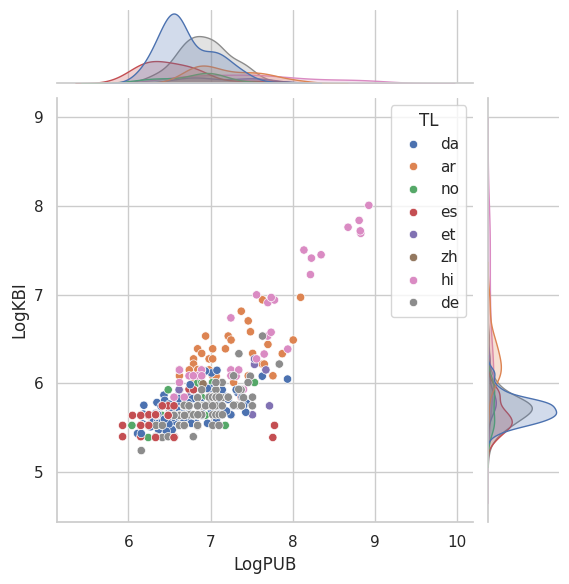

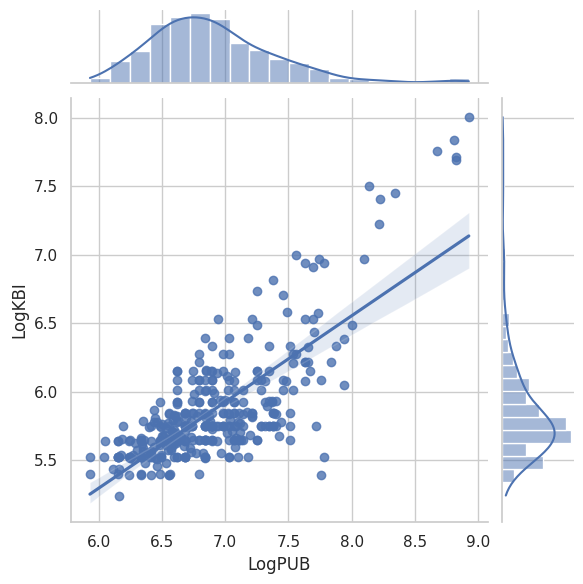

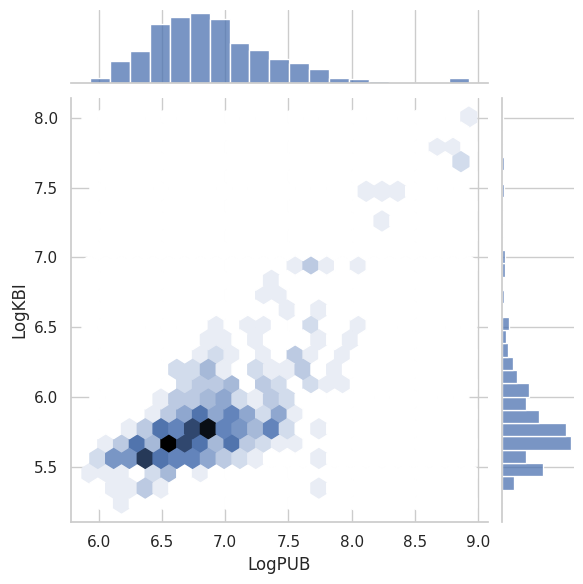

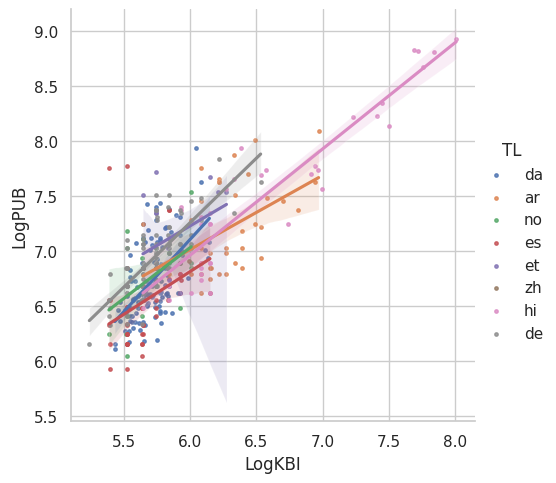

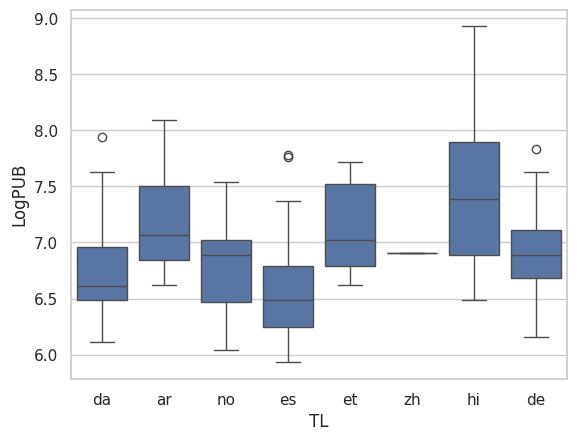

In [97]:
# distribution of translations EN --> X

sns.set(font_scale=1.0)
sns.set_style("whitegrid")


AU1 = AUdf.drop_duplicates(subset=['Study','Session'])
AU1 = AU1[
            (AU1.SL.isin(['en'])) 
            ]

print(AU1.shape, "\n", AU1[['KBI', 'PUB']].describe())

#“scatter” | “kde” | “hist” | “hex” | “reg” | “resid”
sns.jointplot(data=AU1, y="LogKBI", x="LogPUB", hue='TL', kind="kde")
plt.show()

sns.jointplot(data=AU1, y="LogKBI", x="LogPUB", hue='TL', kind="scatter")
plt.show()

sns.jointplot(data=AU1, y="LogKBI", x="LogPUB", kind="reg")
plt.show()

sns.jointplot(data=AU1, y="LogKBI", x="LogPUB", kind="hex")
plt.show()

sns.lmplot(data=AU1, x="LogKBI", y="LogPUB", hue='TL',  scatter_kws={"s": 6})
plt.show()

#sns.lmplot(data=AU1, x="KBI", y="PUB", hue='TL',  scatter_kws={"s": 10})
sns.boxplot(data=AU1, y="LogPUB", x="TL")
plt.show()



# Boxplots log duration and TL, HOF, AU-Type

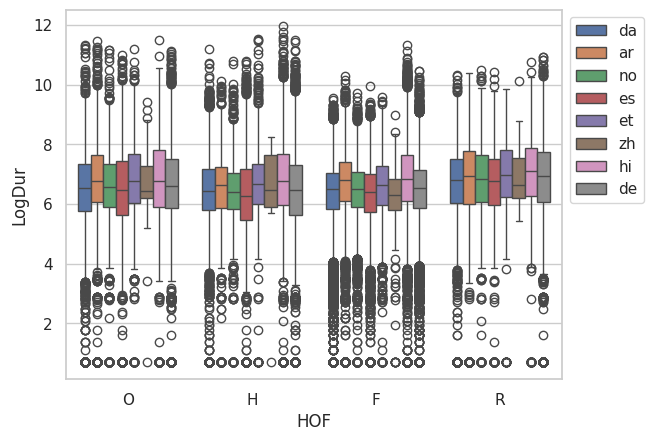

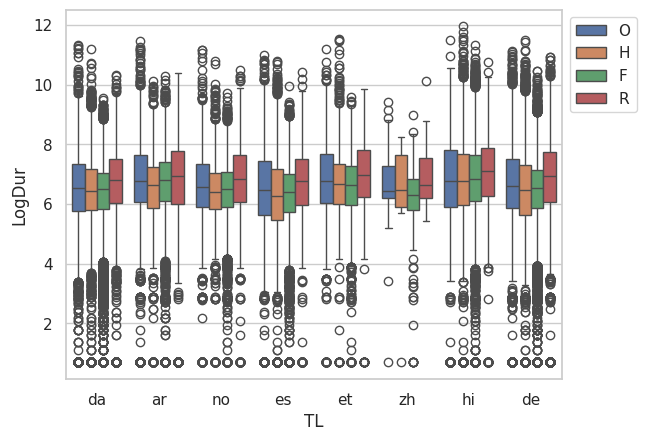

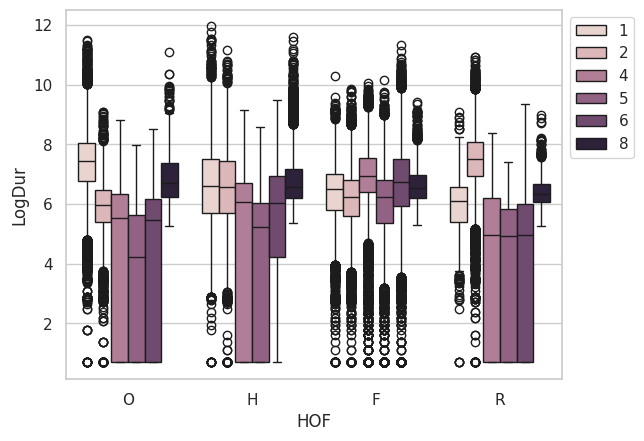

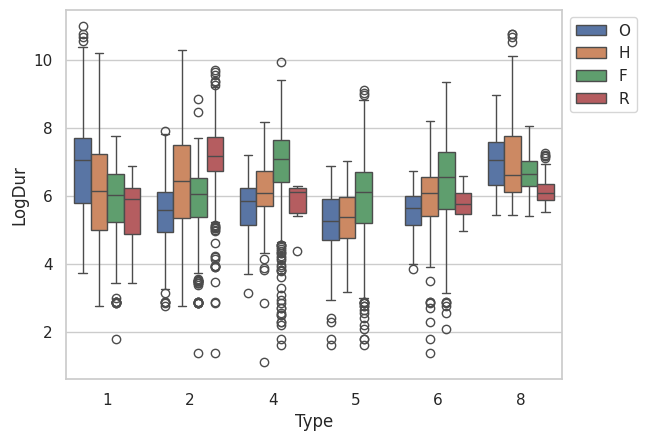

In [114]:
sns.set(font_scale=1.0)
sns.set_style("whitegrid")


#sns.lmplot(data=AU1, x="KBI", y="PUB", hue='TL',  scatter_kws={"s": 10})
sns.boxplot(data=AU1, y="LogDur", hue="TL", x="HOF" )
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

sns.boxplot(data=AU1, y="LogDur", x="TL", hue="HOF" )
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

sns.boxplot(data=AU1, y="LogDur", x="HOF", hue="Type")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

AU1 = AU1[ 
            (AU1.Study.isin(['BML12'])) 
#            & (AU1.Session.isin(['P08_T5'])) 
            & (AU1.Dur > 1) 
            ]
sns.boxplot(data=AU1, y="LogDur", x='Type', hue="HOF")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


#plt.legend(bbox_to_anchor=(1, 1))


# Distribution of Study duration (BML12) and population duration 

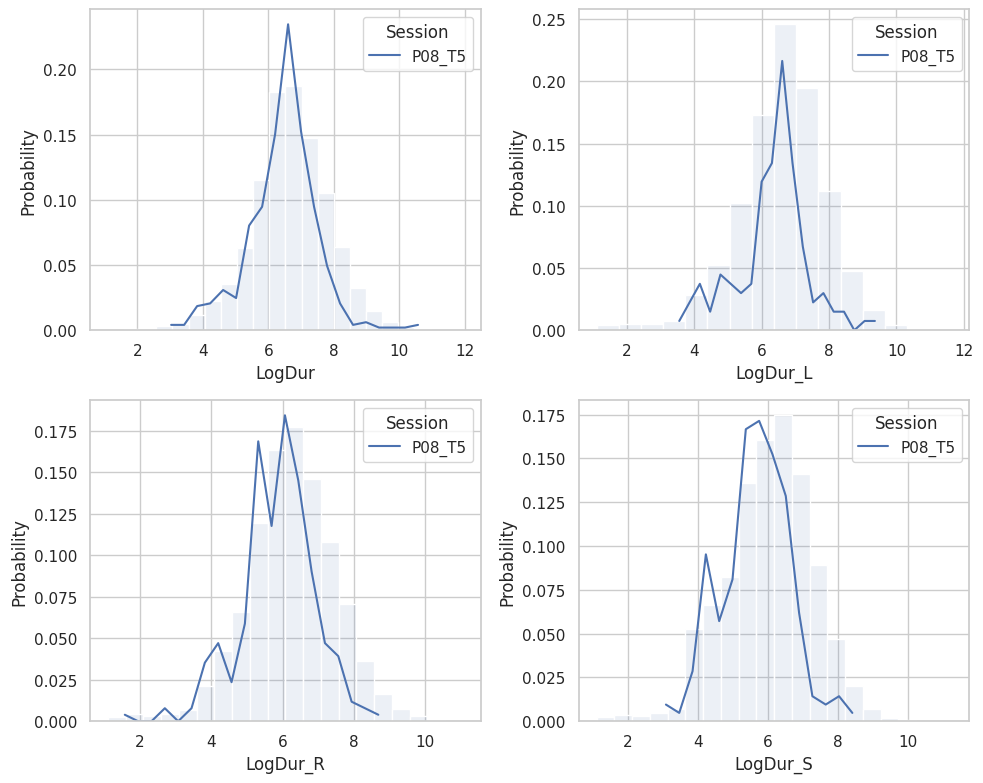

In [107]:
Session_order = ['P08_T5']

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))


AU1 = AUdf[(AUdf.LogDur > 1) & (AUdf.Study == "BML12") & (AUdf.Session.isin(Session_order))]
sns.histplot(data=AU1, x="LogDur", bins=20, alpha=1, hue='Session', stat="probability",  element="poly", fill=False, ax=axes[0, 0])

AU3 = AUdf[(AUdf.LogDur > 1)]
sns.histplot(data=AU3, x="LogDur", bins=22, alpha=0.1, stat="probability", ax=axes[0, 0])
#axes[0, 0].set_title('Histogram of var1')

#  ============

AU1 = AUdf[(AUdf.LogDur_L > 1) & (AUdf.Study == "BML12") & (AUdf.Session.isin(Session_order))]
sns.histplot(data=AU1, x="LogDur_L", bins=20, alpha=1, hue='Session', stat="probability", element="poly", fill=False, ax=axes[0, 1])

AU3 = AUdf[(AUdf.LogDur_L > 1)]
sns.histplot(data=AU3, x="LogDur_L", bins=16, alpha=0.1, stat="probability", ax=axes[0, 1])

# ============
AU1 = AUdf[(AUdf.LogDur_R > 1) & (AUdf.Study == "BML12") & (AUdf.Session.isin(Session_order))]
sns.histplot(data=AU1, x="LogDur_R", bins=20, alpha=1, hue='Session', stat="probability", element="poly", fill=False, ax=axes[1, 0])

AU3 = AUdf[(AUdf.LogDur_R > 1)]
sns.histplot(data=AU3, x="LogDur_R", bins=20, alpha=0.1, stat="probability", ax=axes[1, 0])

# =============

AU1 = AUdf[(AUdf.LogDur_S > 1) & (AUdf.Study == "BML12") & (AUdf.Session.isin(Session_order))]
sns.histplot(data=AU1, x="LogDur_S", bins=15, alpha=1, hue='Session', stat="probability", element="poly", fill=False, ax=axes[1, 1])

AU3 = AUdf[(AUdf.LogDur_S > 1)]
sns.histplot(data=AU3, x="LogDur_S", bins=20, alpha=0.1, stat="probability", ax=axes[1, 1])

plt.tight_layout()

plt.savefig('four_histplots.png')

plt.show()
